Sobre el archivo auctions.csv queremos encontrar los 5 dispositivos que más participaron en subastas.
Para esos 5 dispositivos, queremos visualizar la evolución en el tiempo de la cantidad de subastas.

In [1]:
import pandas as pd
import numpy as np

auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}
auctions = pd.read_csv('auctions.csv.gzip', dtype = auctions_dtypes, compression = 'gzip')

auctions.drop('auction_type_id', axis = 1, inplace = True)
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [2]:
auctions.head(2)

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0


In [3]:
indices_disp = list(auctions['device_id'].value_counts().head(5).index)

In [4]:
df_top_disp = auctions.loc[auctions['device_id'].isin(indices_disp), ['date','device_id']]

In [5]:
df_top_disp.head(10)

,date,device_id
12655,2019-03-12 03:02:37.264242,7298861376107043945
12857,2019-03-12 03:40:56.976592,7298861376107043945
12890,2019-03-12 03:41:40.257843,7298861376107043945
12940,2019-03-12 03:43:01.529164,7298861376107043945
13109,2019-03-12 03:49:58.483260,633139769114048761
13116,2019-03-12 03:50:13.005825,633139769114048761
13788,2019-03-12 03:40:41.270783,7298861376107043945
13792,2019-03-12 03:40:50.814753,7298861376107043945
13797,2019-03-12 03:40:57.657968,7298861376107043945
13825,2019-03-12 03:41:48.382347,7202276635029175071


In [8]:
df_top_disp['date'].dt.year.value_counts()

2019    101772
Name: date, dtype: int64

In [9]:
df_top_disp['date'].dt.month.value_counts()

3    101772
Name: date, dtype: int64

In [10]:
df_top_disp['date'] = df_top_disp['date'].dt.day

In [11]:
df_top_disp.head(3)

,date,device_id
12655,12,7298861376107043945
12857,12,7298861376107043945
12890,12,7298861376107043945


In [14]:
len(df_top_disp)

101772

In [15]:
df_top_disp['cantidad'] = 1

In [16]:
df_top_disp.head(3)

,date,device_id,cantidad
12655,12,7298861376107043945,1
12857,12,7298861376107043945,1
12890,12,7298861376107043945,1


In [91]:
df_subastas_por_dia = df_top_disp.groupby(['date','device_id']).agg({'cantidad': 'count'})

In [92]:
df_subastas_por_dia.head(10)

cantidad
date device_id                    
5    5376802567578262905       122
     6302840482782120473         4
     633139769114048761       2255
     7202276635029175071       875
     7298861376107043945       640
6    5376802567578262905       121
     6302840482782120473        28
     633139769114048761        224
     7202276635029175071       512
     7298861376107043945      1251

In [104]:
df_to_plot = df_subastas_por_dia.unstack()

In [105]:
df_to_plot.head()

cantidad                                         \
device_id 5376802567578262905 6302840482782120473 633139769114048761   
date                                                                   
5                         122                   4               2255   
6                         121                  28                224   
7                        1053                2191               1877   
8                        2227                2233               1865   
9                        1942                2798               2054   

                                                   
device_id 7202276635029175071 7298861376107043945  
date                                               
5                         875                 640  
6                         512                1251  
7                        2933                1316  
8                        2949                1903  
9                        2676                1952

In [107]:
df_to_plot.columns = df_to_plot.columns.droplevel()   #eliminamos el multiindice de las columnas del dataframe

In [108]:
df_to_plot

device_id,5376802567578262905,6302840482782120473,633139769114048761,7202276635029175071,7298861376107043945
date,,,,,
5,122,4,2255,875,640
6,121,28,224,512,1251
7,1053,2191,1877,2933,1316
8,2227,2233,1865,2949,1903
9,1942,2798,2054,2676,1952
10,3315,3623,5777,3414,1459
11,2272,792,4829,3157,3345
12,1902,1689,4625,2217,2757
13,3413,3042,4256,4322,3565


Text(0, 0.5, 'Cantidad de subastas en la que participó el dispositivo')

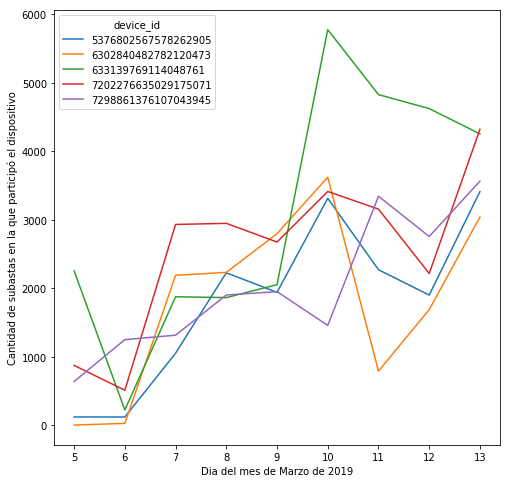

In [113]:
plot = df_to_plot.plot(figsize = (8,8))
plot.set_xlabel('Dia del mes de Marzo de 2019')
plot.set_ylabel('Cantidad de subastas en la que participó el dispositivo')

Encontrar en qué horario (si es que lo hay) se suele registrar la mayor cantidad de clicks. Armar una visualización que muestre los resultados obtenidos

In [114]:
import pandas as pd
import numpy as np
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}

clicks = pd.read_csv('clicks.csv.gzip', dtype = clicks_dtypes, compression = 'gzip')
clicks["created"] =  pd.to_datetime(clicks["created"], errors = "coerce")

In [117]:
clicks.drop('action_id', axis = 1, inplace = True)
clicks.drop('wifi_connection', axis = 1, inplace = True)

In [118]:
clicks['created'] = clicks['created'].dt.hour

In [119]:
clicks.head()

,advertiser_id,source_id,created,country_code,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,22,6333597102633388268,1.206055,1.070312,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,0,10,6333597102633388268,1.218750,1.071289,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,15,6333597102633388268,1.206055,1.070312,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,3,3,6333597102633388268,1.206055,1.070312,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,3,3,6333597102633388268,1.206055,1.070312,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525


In [120]:
clicks['cantidad'] = 1

In [121]:
clicks.head()

,advertiser_id,source_id,created,country_code,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,cantidad
0,2,4,22,6333597102633388268,1.206055,1.070312,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093,1
1,0,0,10,6333597102633388268,1.218750,1.071289,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,1
2,0,0,15,6333597102633388268,1.206055,1.070312,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647,1
3,2,3,3,6333597102633388268,1.206055,1.070312,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525,1
4,2,3,3,6333597102633388268,1.206055,1.070312,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525,1


In [123]:
cant_clicks_hora = clicks.groupby('created').agg({'cantidad': 'count'})

In [126]:
cant_clicks_hora.head()

,cantidad
created,
0,440
1,4209
2,2327
3,754
4,1079


In [134]:
horarios_con_mas_clicks = cant_clicks_hora['cantidad'].sort_values(ascending = False)

In [135]:
horarios_con_mas_clicks

created
1     4209
23    2726
2     2327
11    1455
22    1386
12    1199
10    1143
4     1079
16     966
15     959
5      945
13     926
14     834
9      754
3      754
6      678
18     655
17     641
8      537
7      518
21     451
0      440
20     389
19     380
Name: cantidad, dtype: int64

In [140]:
cant_clicks_hora.head(5)

,cantidad
created,
0,440
1,4209
2,2327
3,754
4,1079


Text(0, 0.5, 'Cantidad de clicks realizados')

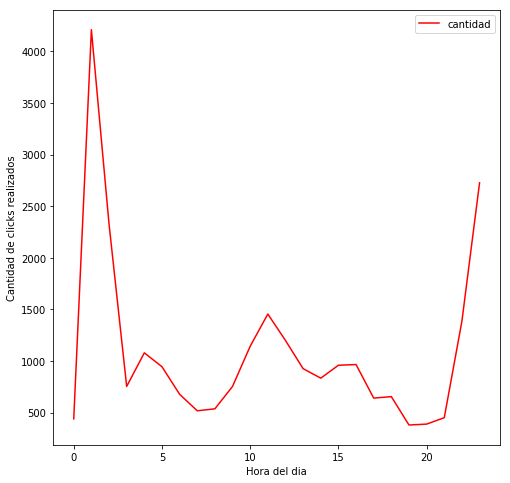

In [145]:
ploteo_horas = cant_clicks_hora.plot(figsize = (8,8), color = 'red')
ploteo_horas.set_xlabel('Hora del dia')
ploteo_horas.set_ylabel('Cantidad de clicks realizados')

In [150]:
horarios_clicks = clicks['created']  #es la serie que sera ploteada en el histograma

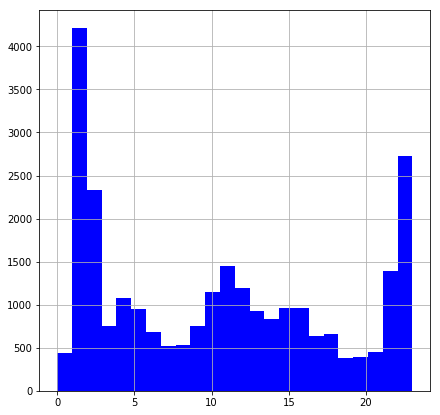

In [151]:
horarios_clicks.hist(bins = 24, figsize = (7, 7), color = 'blue')